In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Simulate co-culture data based on parameters from Gompertz fits

In [17]:
# Gompertz function incorporating initial species population (N0)
def gompertz(t, A, mu, lambda_, N0):
    return N0 + (A - N0) * np.exp(-np.exp((mu * np.e / A) * (lambda_ - t) + 1))

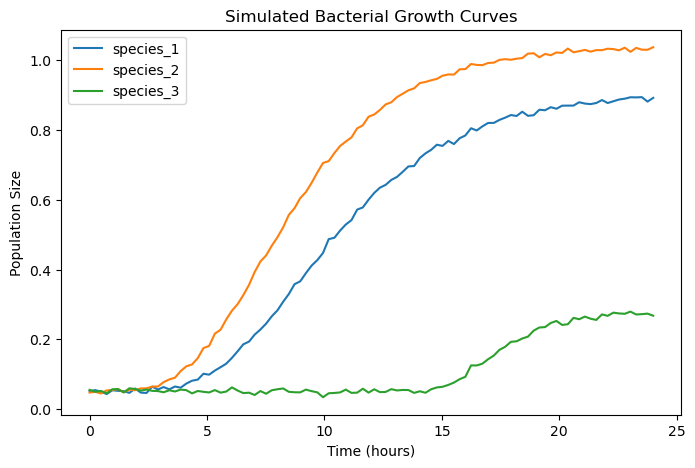

Simulation complete! Data saved to 'simulated_growth_data.csv'.


In [51]:
# Initial population sizes
init_species = np.array([0.05, 0.05, 0.05])  # Customize for each species

# Simulation parameters
num_species = 3  # Number of bacterial species
times = np.linspace(0, 24, 100)  # Time points from 0 to 50 hours

# Define Gompertz parameters for each species (A, mu, lambda)
parameters = {
    "So": {"A": 0.91, "mu": 0.09, "lambda_": 5.2},
    "Pp": {"A": 1.04, "mu": 0.12, "lambda_": 4.07},
    "Ss": {"A": 0.28, "mu": 0.06, "lambda_": 15.0},
}


# Simulate growth curves
yobs = np.zeros((len(times), num_species))

for i, (species, params) in enumerate(parameters.items()):
    yobs[:, i] = gompertz(times, **params, N0=init_species[i])

# Add Gaussian noise
yobs += np.random.normal(loc=0, scale=0.005, size=yobs.shape)

# Plot function
def plot_gLV(yobs, timepoints):
    plt.figure(figsize=(8, 5))
    for i in range(yobs.shape[1]):
        plt.plot(timepoints, yobs[:, i], label=f"species_{i+1}")
    plt.xlabel("Time (hours)")
    plt.ylabel("Population Size")
    plt.legend()
    plt.title("Simulated Bacterial Growth Curves")
    plt.show()

# Plot results
plot_gLV(yobs, times)

# Save data to CSV
df = pd.DataFrame(yobs, columns=[f"species_{i+1}" for i in range(num_species)])
df["time"] = times
df = df[["time"] + [f"species_{i+1}" for i in range(num_species)]]  # Reorder columns
df.to_csv("simulated_growth_data.csv", index=False)

print("Simulation complete! Data saved to 'simulated_growth_data.csv'.")